In [1]:
from sklearn.datasets import load_diabetes
import statsmodels.api as sm

In [3]:
diabetes = load_diabetes()

### DataFrame 형식으로 작성

In [14]:
df_x = pd.DataFrame(diabetes.data, columns=['X{}'.format(i) for i in range(1,11)])
df_y = pd.DataFrame(diabetes.target, columns=['Y'])
df0 = sm.add_constant(df_x)
df = pd.concat([df0, df_y], axis=1)
df.tail(3)

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
439,1,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,1,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0
441,1,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,57.0


### Target 데이터 스케일링

In [16]:
from sklearn.preprocessing import scale

In [19]:
df['Y'] = scale(df['Y'])
df.tail(3)

,const,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,Y
439,1,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,-0.261454
440,1,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,0.881318
441,1,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064,-1.235408


### Pairplot

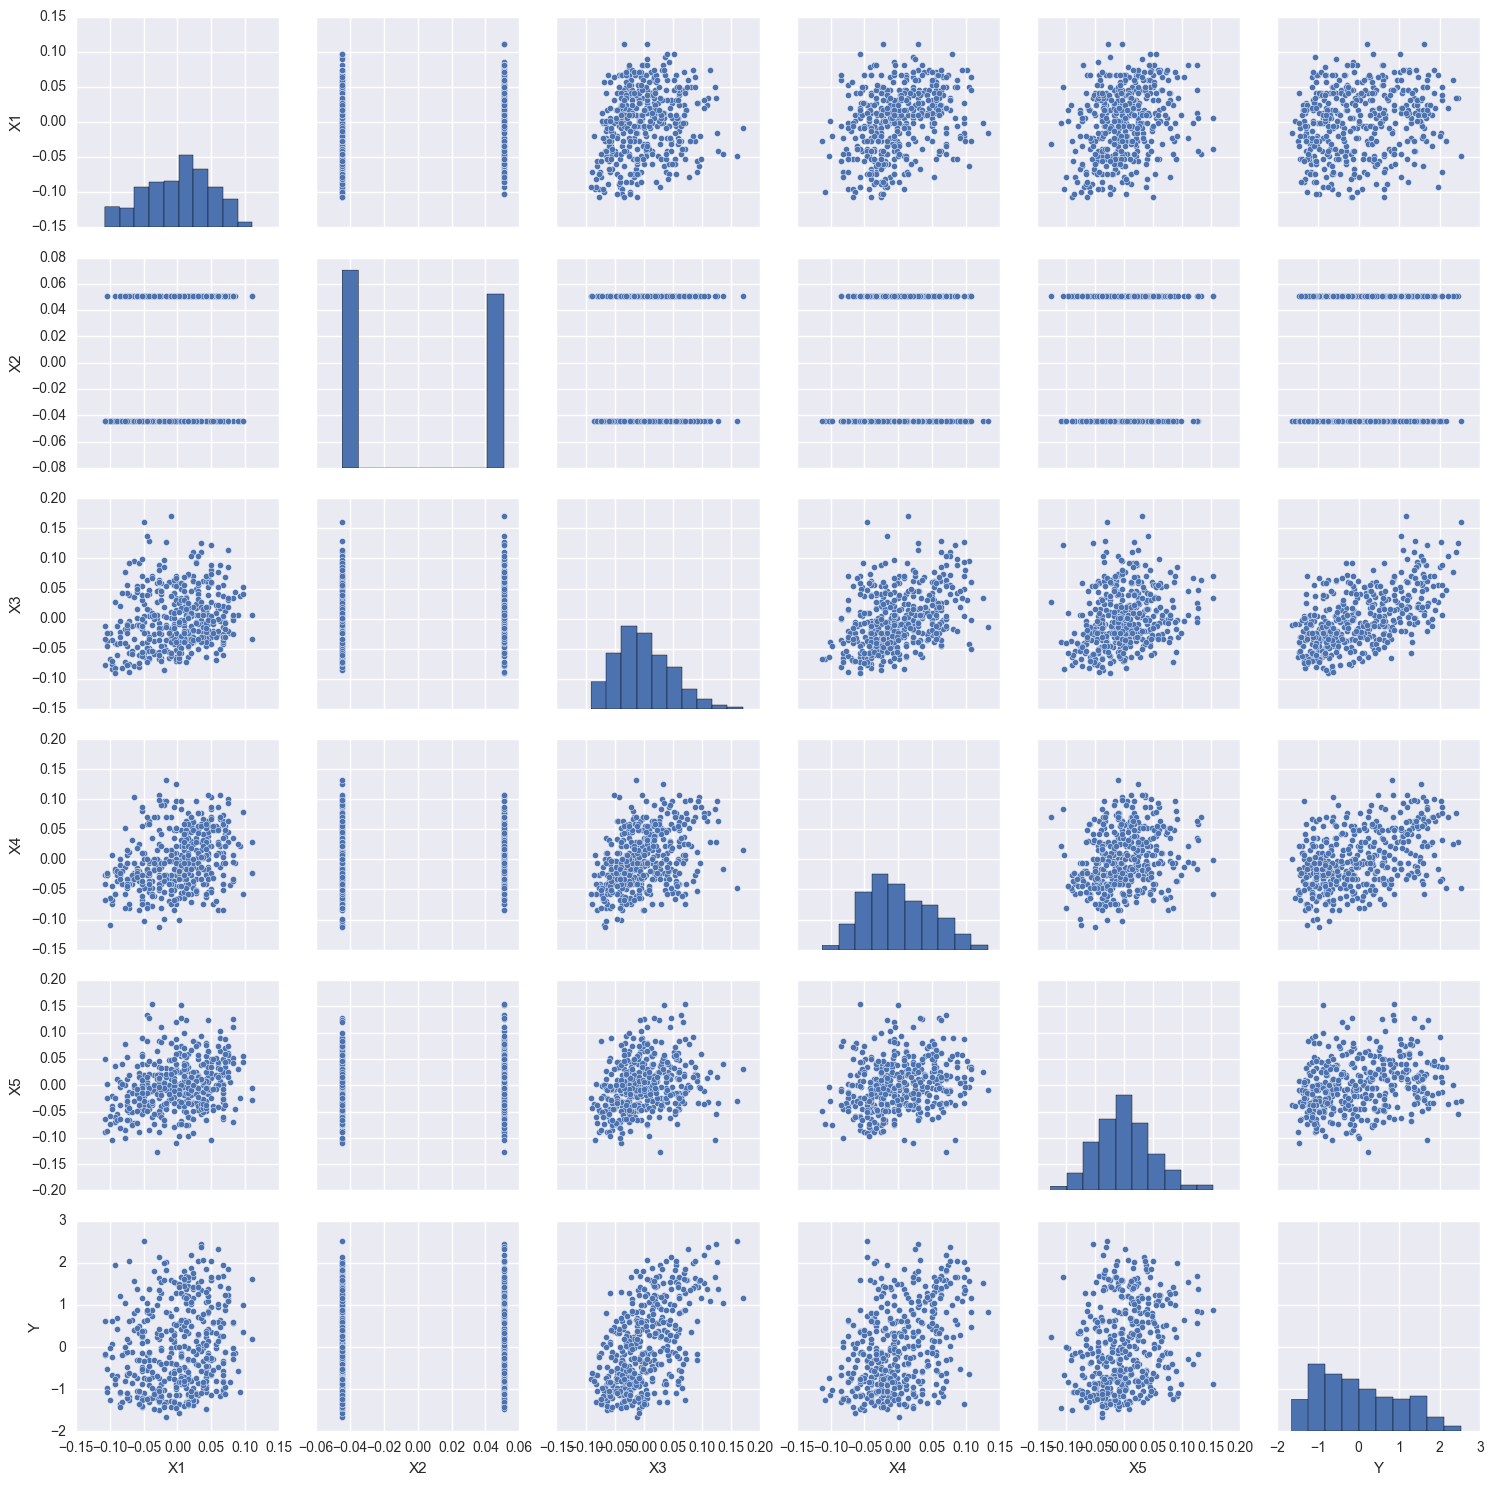

In [23]:
sns.pairplot(df.ix[:,['X1', 'X2', 'X3', 'X4','X5', 'Y']])
plt.show()

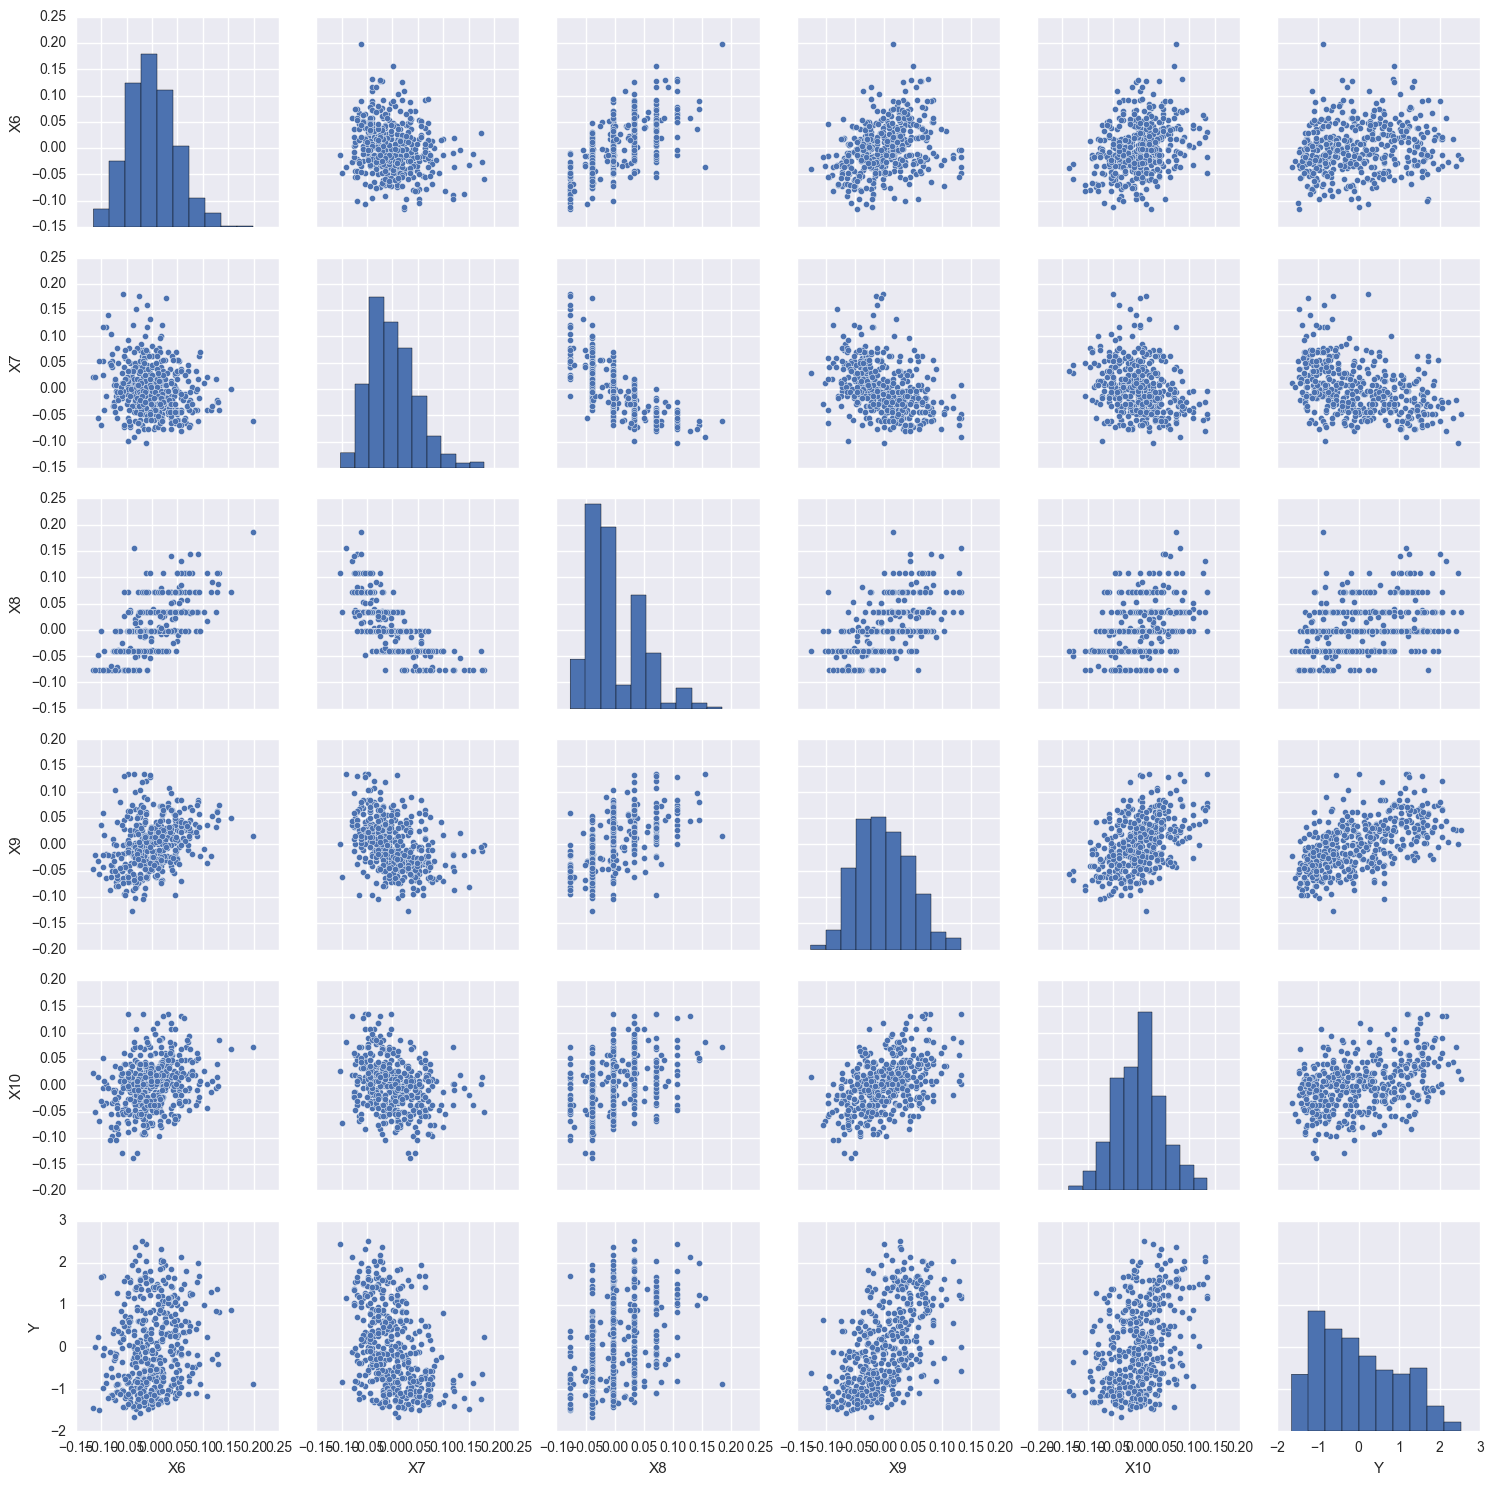

In [22]:
sns.pairplot(df.ix[:,['X6','X7','X8','X9','X10','Y']])
plt.show()

### Regression 1
- X1, X6, X7, X8, X10 유의하지 않다

In [25]:
model = sm.OLS(df.ix[:,-1], df.ix[:,:-1])
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           3.83e-62
Time:                        21:07:21   Log-Likelihood:                -466.00
No. Observations:                 442   AIC:                             954.0
Df Residuals:                     431   BIC:                             999.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       5.768e-17      0.033   1.72e-15      1.0

In [ ]:
#상수항 삭제 후 다시 OLS
df.drop('const', axis=1, inplace=True)

In [28]:
model=sm.OLS(df.ix[:,-1], df.ix[:,:-1])
result = model.fit()
print result.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.38
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           2.68e-62
Time:                        21:09:52   Log-Likelihood:                -466.00
No. Observations:                 442   AIC:                             952.0
Df Residuals:                     432   BIC:                             992.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1            -0.1300      0.775     -0.168      0.8

### Heatmap 으로 상관계수 확인
- X5 & X6/ X6 & X8/ X8 & X9/ X5 & X8/ X7 & X8/ X3 & X8,X9/ X10 & X8,X9 상관관계가 높다

In [32]:
df.ix[:,:-1].corr()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
X1,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
X2,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
X3,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
X4,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
X5,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
X6,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
X7,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
X8,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
X9,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
X10,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


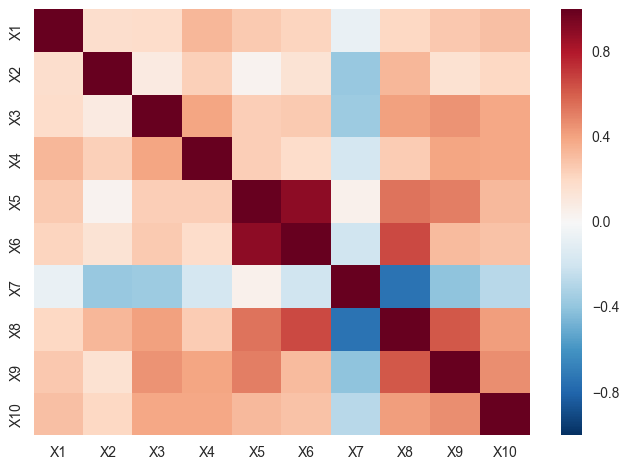

In [33]:
sns.heatmap(df.ix[:,:-1].corr())
plt.show()

### ANOVA 분석으로 변수 중요도 파악
- X2, X5, X8, X10 (X6) 영향력이 없다

In [37]:
model = sm.OLS.from_formula('Y ~ X1+X2+X3+X4+X5+X6+X7+X8+X9+X10 -1', data=df)
result = model.fit()
anv = sm.stats.anova_lm(result)
anv

,df,sum_sq,mean_sq,F,PR(>F)
X1,1.0,15.603565,15.603565,31.623690,3.365139e-08
X2,1.0,0.049473,0.049473,0.100266,7.516637e-01
X3,1.0,139.455535,139.455535,282.634050,3.683572e-49
X4,1.0,21.806826,21.806826,44.195818,8.988100e-11
X5,1.0,0.302025,0.302025,0.612113,4.344218e-01
X6,1.0,0.852987,0.852987,1.728745,1.892688e-01
X7,1.0,40.023046,40.023046,81.114568,6.878909e-18
X8,1.0,0.307111,0.307111,0.622421,4.305817e-01
X9,1.0,9.925213,9.925213,20.115394,9.356646e-06
X10,1.0,0.519466,0.519466,1.052800,3.054373e-01


### Regression 2 (X8, X10 제거)

In [40]:
df2 = df.drop(['X8', 'X10'], axis=1)
model2 = sm.OLS(df2.ix[:,-1], df2.ix[:,:-1])
result2 = model2.fit()
print result2.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     57.61
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           1.52e-63
Time:                        22:09:20   Log-Likelihood:                -467.24
No. Observations:                 442   AIC:                             950.5
Df Residuals:                     434   BIC:                             983.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1            -0.0301      0.769     -0.039      0.9

### PCA로 차원축소

In [42]:
from sklearn.decomposition import PCA

In [44]:
pca = PCA(1)
X11 = pca.fit_transform(df.ix[:,['X8','X10']])

array([[ -1.43107008e-02],
       [ -9.31241476e-02],
       [ -2.01685246e-02],
       [  1.76401558e-02],
       [ -3.48130840e-02],
       [ -1.22146092e-01],
       [ -5.50482930e-02],
       [  1.46850267e-02],
       [  6.19168242e-03],
       [ -1.13817889e-02],
       [ -7.82124140e-02],
       [  8.58624593e-03],
       [ -5.79772049e-02],
       [ -1.13817889e-02],
       [ -8.14085000e-02],
       [  4.63949263e-02],
       [ -8.18570284e-03],
       [  2.34979796e-02],
       [ -1.43107008e-02],
       [ -6.67639406e-02],
       [ -1.69724385e-02],
       [ -4.04037336e-02],
       [ -3.74748217e-02],
       [  1.46245105e-01],
       [ -4.06709078e-02],
       [  6.66844535e-05],
       [ -5.77100307e-02],
       [  6.01032826e-04],
       [ -6.67639406e-02],
       [ -1.67052643e-02],
       [ -3.45459098e-02],
       [ -8.40702377e-02],
       [  9.61864284e-02],
       [ -5.18522070e-02],
       [ -7.55506763e-02],
       [ -2.39588791e-02],
       [ -4.62615574e-02],
 

In [48]:
X_new = pd.DataFrame(X11, columns=['X11'])
df_pca0 = df.drop(['X8', 'X10', 'Y'], axis=1)
df_pca = pd.concat([df_pca0, X_new, df_y], axis=1)
df_pca['Y']=scale(df_pca['Y'])

In [49]:
model3 = sm.OLS(df_pca.ix[:,-1], df_pca.ix[:,:-1])
result3 = model3.fit()
print result3.summary()

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     51.57
Date:                Sun, 23 Apr 2017   Prob (F-statistic):           4.36e-63
Time:                        22:36:34   Log-Likelihood:                -466.19
No. Observations:                 442   AIC:                             950.4
Df Residuals:                     433   BIC:                             987.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
X1            -0.1594      0.773     -0.206      0.8